# South Korea Qiskit Hackathon'20 - Qiskit Metal exercise

## Preparation

In [1]:
%load_ext autoreload
%autoreload 2

*Make sure to have the right kernel selected!*

In [4]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

In [6]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder

from qiskit_metal.qlibrary.lumped.cap_3_interdigital import Cap3Interdigital
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

In [8]:
design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)

Since we are likely to be making many changes while tuning and modifying our design, we will enable overwriting. We can also check all of the chip properties to see if we want to change the size or any other parameter.

In [10]:
design.overwrite_enabled = True
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

We will add the two qubits. We know we will want each qubit to have two connection pads, one for readout, and another for the connection to the other qubit. We can see any options the qubit qcomponent has to figure out what we might want to modify when creating the component. This will include the components default options (which the component designer included) as well as renderer options (which are added based on what renderers are present in Metal).

In [13]:
TransmonPocketCL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'make_CL': True,
 'cl_gap': '6um',
 'cl_width': '10um',
 'cl_length': '20um',
 'cl_ground_gap': '6um',
 'cl_pocket_edge': '0',
 'cl_off_center': '50um',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 

We will then add those two qubits with the options we are wanting to define, these can all be modified easily later too.
The rebuild command is included so the changes can be seen immediately in the GUI.

In [33]:
options =  dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    cl_pocket_edge = '180',
    connection_pads=dict(
        readout = dict(loc_W=+1, loc_H=+1)
    ))
        
Q1 = TransmonPocketCL(design,'Q1', options = dict(
        pos_x='0.7mm', 
        pos_y='0mm', 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance ='14nH',
        **options))


gui.rebuild()
gui.autoscale()

In [50]:
Q1 

name:    Q1
class:   TransmonPocketCL      
options: 
  'pos_x'             : '0.7mm',                      
  'pos_y'             : '0mm',                        
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
       'readout'           : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '125um',                      
            'pad_height'        : '30um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '25um',                       
            'cpw_width'         : 'cpw_width',                  
            'cpw_gap'           : 'cpw_gap',                    
            'cpw_extend'        : '100um',                      
            'pocket_extent'     : '5um',                        
            'pocket_rise'    

In [33]:
cap_Q1 = Cap3Interdigital(design, 'Cap_Q1', options= dict(pos_x='2.5mm', pos_y='0.25mm', orientation='90', finger_length = '40um'))

gui.rebuild()
gui.autoscale()

In [48]:
cap_Q1 

name:    Cap_Q1
class:   Cap3Interdigital      
options: 
  'pos_x'             : '2.5mm',                      
  'pos_y'             : '0.25mm',                     
  'orientation'       : '90',                         
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'trace_width'       : '10um',                       
  'finger_length'     : '40um',                       
  'pocket_buffer_width_x': '10um',                       
  'pocket_buffer_width_y': '30um',                       
module:  qiskit_metal.qlibrary.lumped.cap_3_interdigital
id:      2

In [22]:
readout_Q1 = RouteMeander(design,'Readout_Q1', options = dict( 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q1',
                                                    pin='readout'),
                                                end_pin=Dict(
                                                    component='Cap_Q1',
                                                    pin='a')
                                            ),
                                            lead=Dict(
                                                start_straight='0.325mm',
                                                end_straight = '125um'#put jogs here
                                            ),
                                            meander=Dict(
                                                asymmetry = '-50um'),
                                            fillet = "99um",
                                            total_length = '5mm'))

gui.rebuild()
gui.autoscale()

In [46]:
readout_Q1 

name:    Readout_Q1
class:   RouteMeander          
options: 
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'pin_inputs'        : {
       'start_pin'         : {
            'component'         : 'Q1',                         
            'pin'               : 'readout',                    
                             },
       'end_pin'           : {
            'component'         : 'Cap_Q1',                     
            'pin'               : 'a',                          
                             },
                        },
  'fillet'            : '99um',                       
  'lead'              : {
       'start_straight'    : '0.325mm',                    
       'end_straight'      : '125um',                      
       'start_jogged_extension': '',                           
       'end_jogged_extension': '',                           
                        },
  'total_length'      : '5mm',     

In [25]:
launch_Q1_read = LaunchpadWirebond(design, 'Launch_Q1_Read', options = dict(pos_x = '3.5mm', orientation = '180'))

launch_Q1_cl = LaunchpadWirebond(design, 'Launch_Q1_CL', options = dict(pos_x = '1.35mm', pos_y = '-2.5mm', orientation = '90'))

gui.rebuild()
gui.autoscale()

In [42]:
launch_Q1_read 


name:    Launch_Q1_Read
class:   LaunchpadWirebond     
options: 
  'pos_x'             : '3.5mm',                      
  'pos_y'             : '0.0um',                      
  'orientation'       : '180',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'trace_width'       : 'cpw_width',                  
  'trace_gap'         : 'cpw_gap',                    
  'lead_length'       : '25um',                       
  'pad_width'         : '80um',                       
  'pad_height'        : '80um',                       
  'pad_gap'           : '58um',                       
  'taper_height'      : '122um',                      
module:  qiskit_metal.qlibrary.terminations.launchpad_wb
id:      4

In [44]:
launch_Q1_cl 

name:    Launch_Q1_CL
class:   LaunchpadWirebond     
options: 
  'pos_x'             : '1.35mm',                     
  'pos_y'             : '-2.5mm',                     
  'orientation'       : '90',                         
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'trace_width'       : 'cpw_width',                  
  'trace_gap'         : 'cpw_gap',                    
  'lead_length'       : '25um',                       
  'pad_width'         : '80um',                       
  'pad_height'        : '80um',                       
  'pad_gap'           : '58um',                       
  'taper_height'      : '122um',                      
module:  qiskit_metal.qlibrary.terminations.launchpad_wb
id:      5

In [27]:
tl_Q1 = RoutePathfinder(design, 'TL_Q1', options = dict(
                                            fillet='99um',
                                            lead=dict(end_straight='150um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Launch_Q1_Read',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Cap_Q1',
                                                    pin='b')
                                            )))

gui.rebuild()
gui.autoscale()

In [37]:
tl_Q1 

name:    TL_Q1
class:   RoutePathfinder       
options: 
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'pin_inputs'        : {
       'start_pin'         : {
            'component'         : 'Launch_Q1_Read',             
            'pin'               : 'tie',                        
                             },
       'end_pin'           : {
            'component'         : 'Cap_Q1',                     
            'pin'               : 'b',                          
                             },
                        },
  'fillet'            : '99um',                       
  'lead'              : {
       'start_straight'    : '0mm',                        
       'end_straight'      : '150um',                      
       'start_jogged_extension': '',                           
       'end_jogged_extension': '',                           
                        },
  'total_length'      : '7mm',          

In [29]:
tl_Q1_cl = RoutePathfinder(design, 'TL_Q1_CL', options = dict(
                                            fillet='99um',
                                            lead=dict(end_straight='150um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Launch_Q1_CL',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q1',
                                                    pin='Charge_Line')
                                            )))

gui.rebuild()
gui.autoscale()

In [35]:
tl_Q1_cl

name:    TL_Q1_CL
class:   RoutePathfinder       
options: 
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'pin_inputs'        : {
       'start_pin'         : {
            'component'         : 'Launch_Q1_CL',               
            'pin'               : 'tie',                        
                             },
       'end_pin'           : {
            'component'         : 'Q1',                         
            'pin'               : 'Charge_Line',                
                             },
                        },
  'fillet'            : '99um',                       
  'lead'              : {
       'start_straight'    : '0mm',                        
       'end_straight'      : '150um',                      
       'start_jogged_extension': '',                           
       'end_jogged_extension': '',                           
                        },
  'total_length'      : '7mm',       

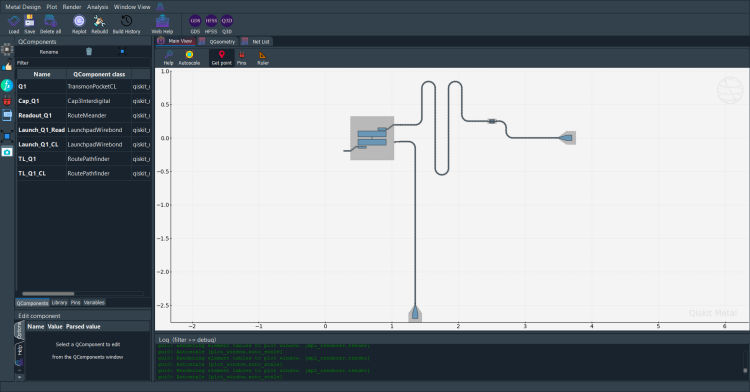

In [31]:
gui.screenshot()

### Rendering to a GDS File

Once all of the tuning is complete, we will want to prepare a GDS file so we can create a mask and fabricate our chip. We first create a gds render instance.

The various options for the gds renderer can be checked and changed as necessary. A key option is the gds file which holds the cells for your junction ebeam design. Make sure this is pointing at the correct file so they are placed in your final mask at the appropriate locations.

In [138]:
 #gui.main_window.close()